# Decision tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
#from sklearn.
#import 

In [2]:
df = pd.read_csv("/media/radial/Work/BDAP/Assignments/Term 3/ML_Patil/Smarket.csv")

In [3]:
df.head()

Unnamed: 0  Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today  \
0           1  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959   
1           2  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032   
2           3  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623   
3           4  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614   
4           5  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213   

  Direction  
0        Up  
1        Up  
2      Down  
3        Up  
4        Up

In [8]:
df.columns

Index(['Unnamed: 0', 'Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume',
       'Today', 'Direction'],
      dtype='object')

#  CORRELATIOn

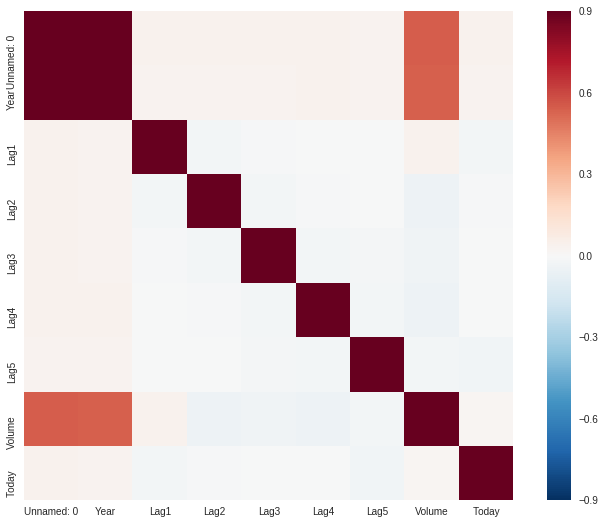

In [7]:
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.9, square=True)

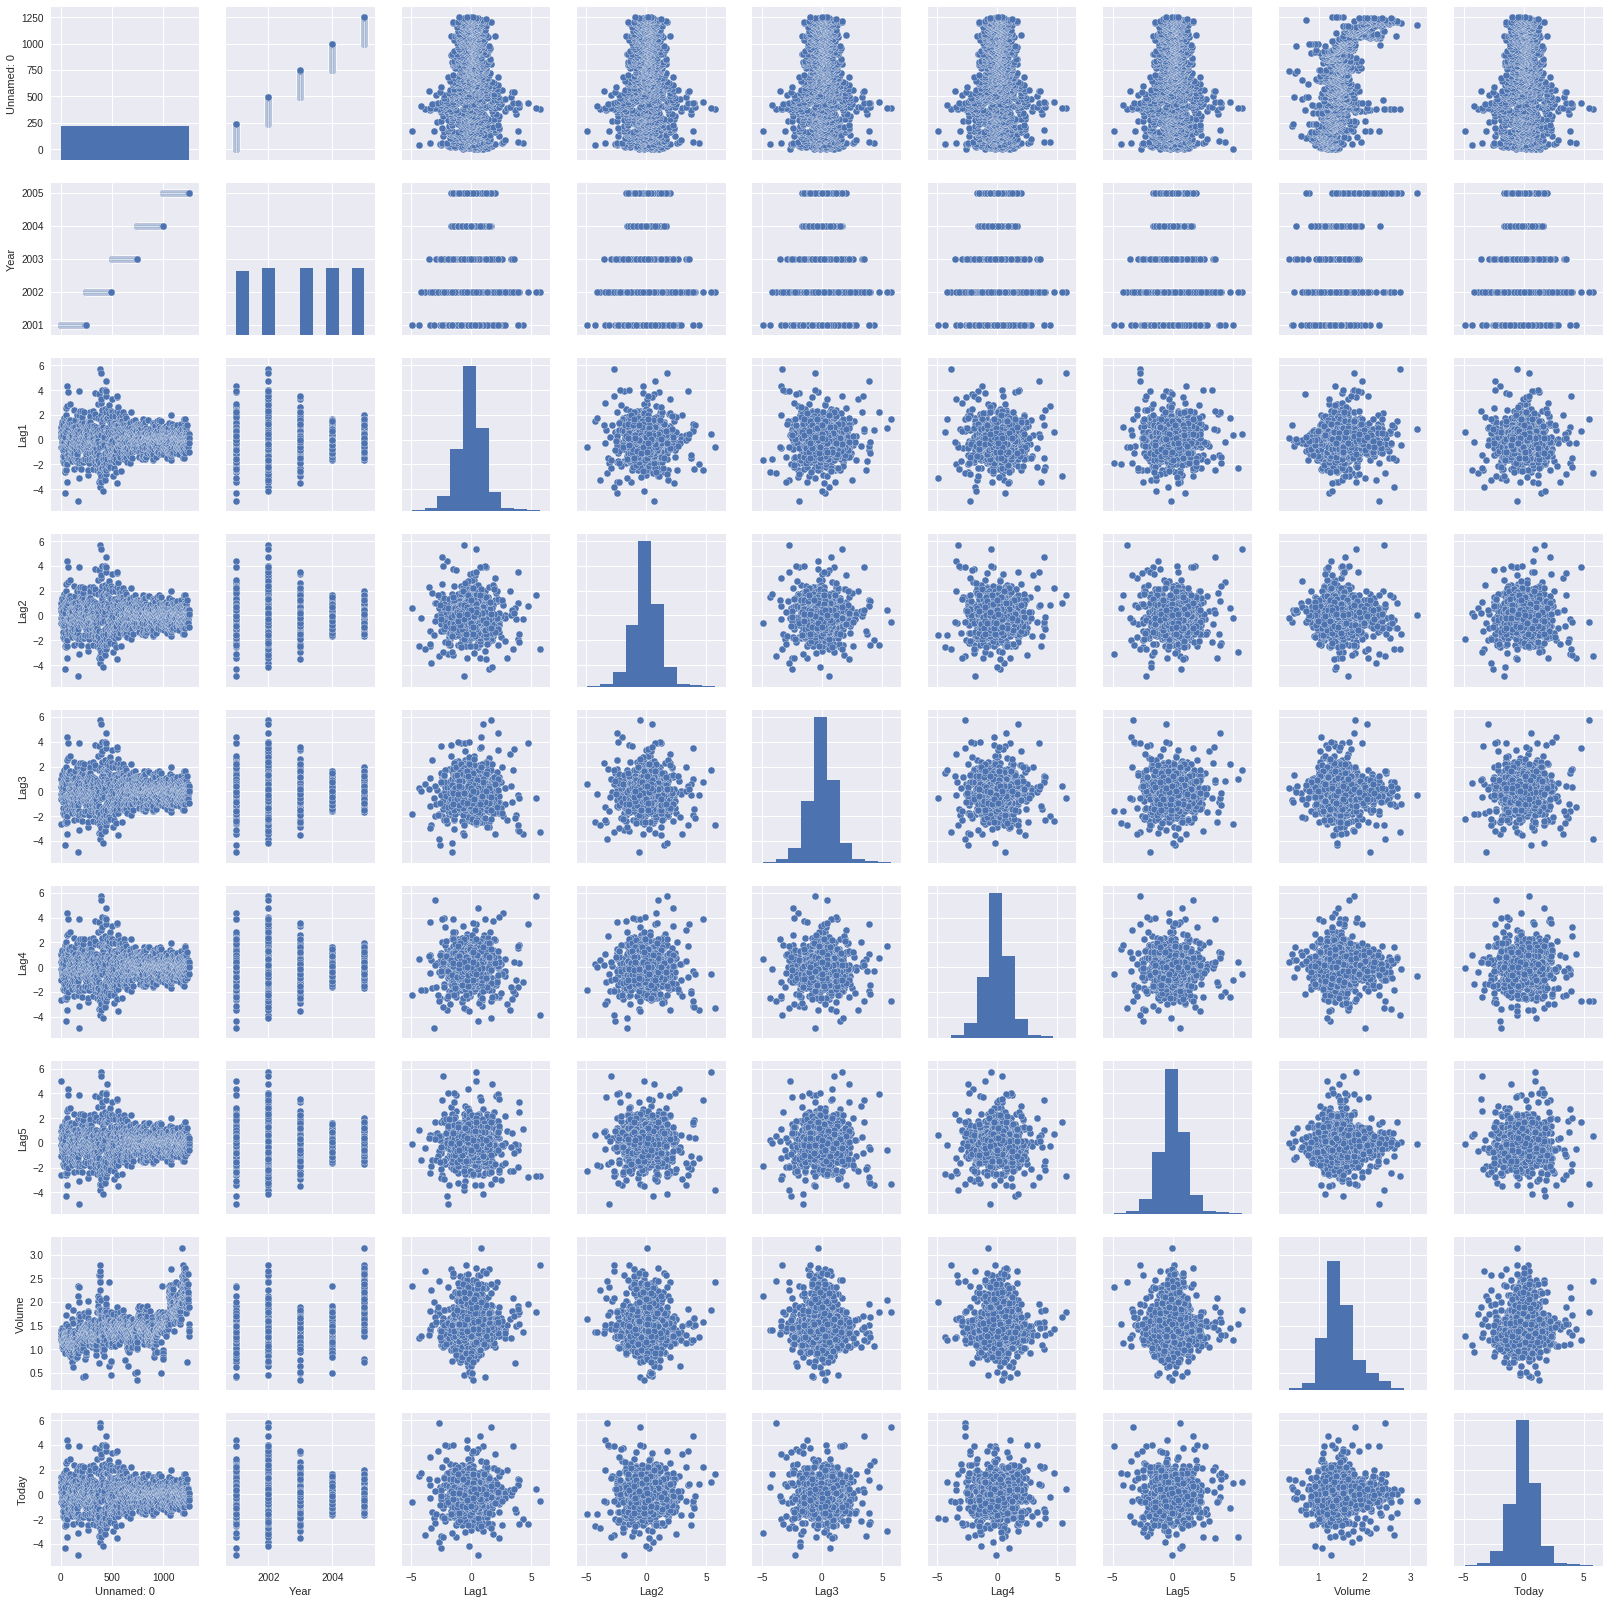

In [10]:
sns.pairplot(df[['Unnamed: 0', 'Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume',
       'Today', 'Direction']]);

In [11]:
df.corr()

Unnamed: 0      Year      Lag1      Lag2      Lag3      Lag4  \
Unnamed: 0    1.000000  0.979773  0.035415  0.036022  0.038989  0.041437   
Year          0.979773  1.000000  0.029700  0.030596  0.033195  0.035689   
Lag1          0.035415  0.029700  1.000000 -0.026294 -0.010803 -0.002986   
Lag2          0.036022  0.030596 -0.026294  1.000000 -0.025897 -0.010854   
Lag3          0.038989  0.033195 -0.010803 -0.025897  1.000000 -0.024051   
Lag4          0.041437  0.035689 -0.002986 -0.010854 -0.024051  1.000000   
Lag5          0.035025  0.029788 -0.005675 -0.003558 -0.018808 -0.027084   
Volume        0.546348  0.539006  0.040910 -0.043383 -0.041824 -0.048414   
Today         0.035273  0.030095 -0.026155 -0.010250 -0.002448 -0.006900   

                Lag5    Volume     Today  
Unnamed: 0  0.035025  0.546348  0.035273  
Year        0.029788  0.539006  0.030095  
Lag1       -0.005675  0.040910 -0.026155  
Lag2       -0.003558 -0.043383 -0.010250  
Lag3       -0.018808 -0.041824 -0.002448  
Lag4       -0.027084 -0.048414 -0.006900  
Lag5        1.000000 -0.022002 -0.034860  
Volume     -0.022002  1.000000  0.014592  
Today      -0.034860  0.014592  1.000000

In [17]:
dd = df
dd.drop("Direction", axis = 1, inplace=True)
dd.head()

Unnamed: 0  Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today
0           1  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959
1           2  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032
2           3  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623
3           4  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614
4           5  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213

In [19]:
df = pd.read_csv("/media/radial/Work/BDAP/Assignments/Term 3/ML_Patil/Smarket.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 10 columns):
Unnamed: 0    1250 non-null int64
Year          1250 non-null int64
Lag1          1250 non-null float64
Lag2          1250 non-null float64
Lag3          1250 non-null float64
Lag4          1250 non-null float64
Lag5          1250 non-null float64
Volume        1250 non-null float64
Today         1250 non-null float64
Direction     1250 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 97.7+ KB


In [26]:
from sklearn.model_selection  import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dd,df.Direction, test_size=250, random_state=101)

In [27]:
from sklearn import tree

In [28]:
model_dt =tree.DecisionTreeClassifier(criterion='entropy', splitter="random")

In [29]:
#?tree.DecisionTreeClassifier()

In [30]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')

In [32]:
pred = model_dt.predict(x_test)
exp=y_test

In [33]:
from sklearn import metrics
print(metrics.confusion_matrix(exp,pred))

[[117   0]
 [  1 132]]


In [47]:
classes = ["up","down"] 
features = ['Unnamed: 0', 'Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume',
       'Today']

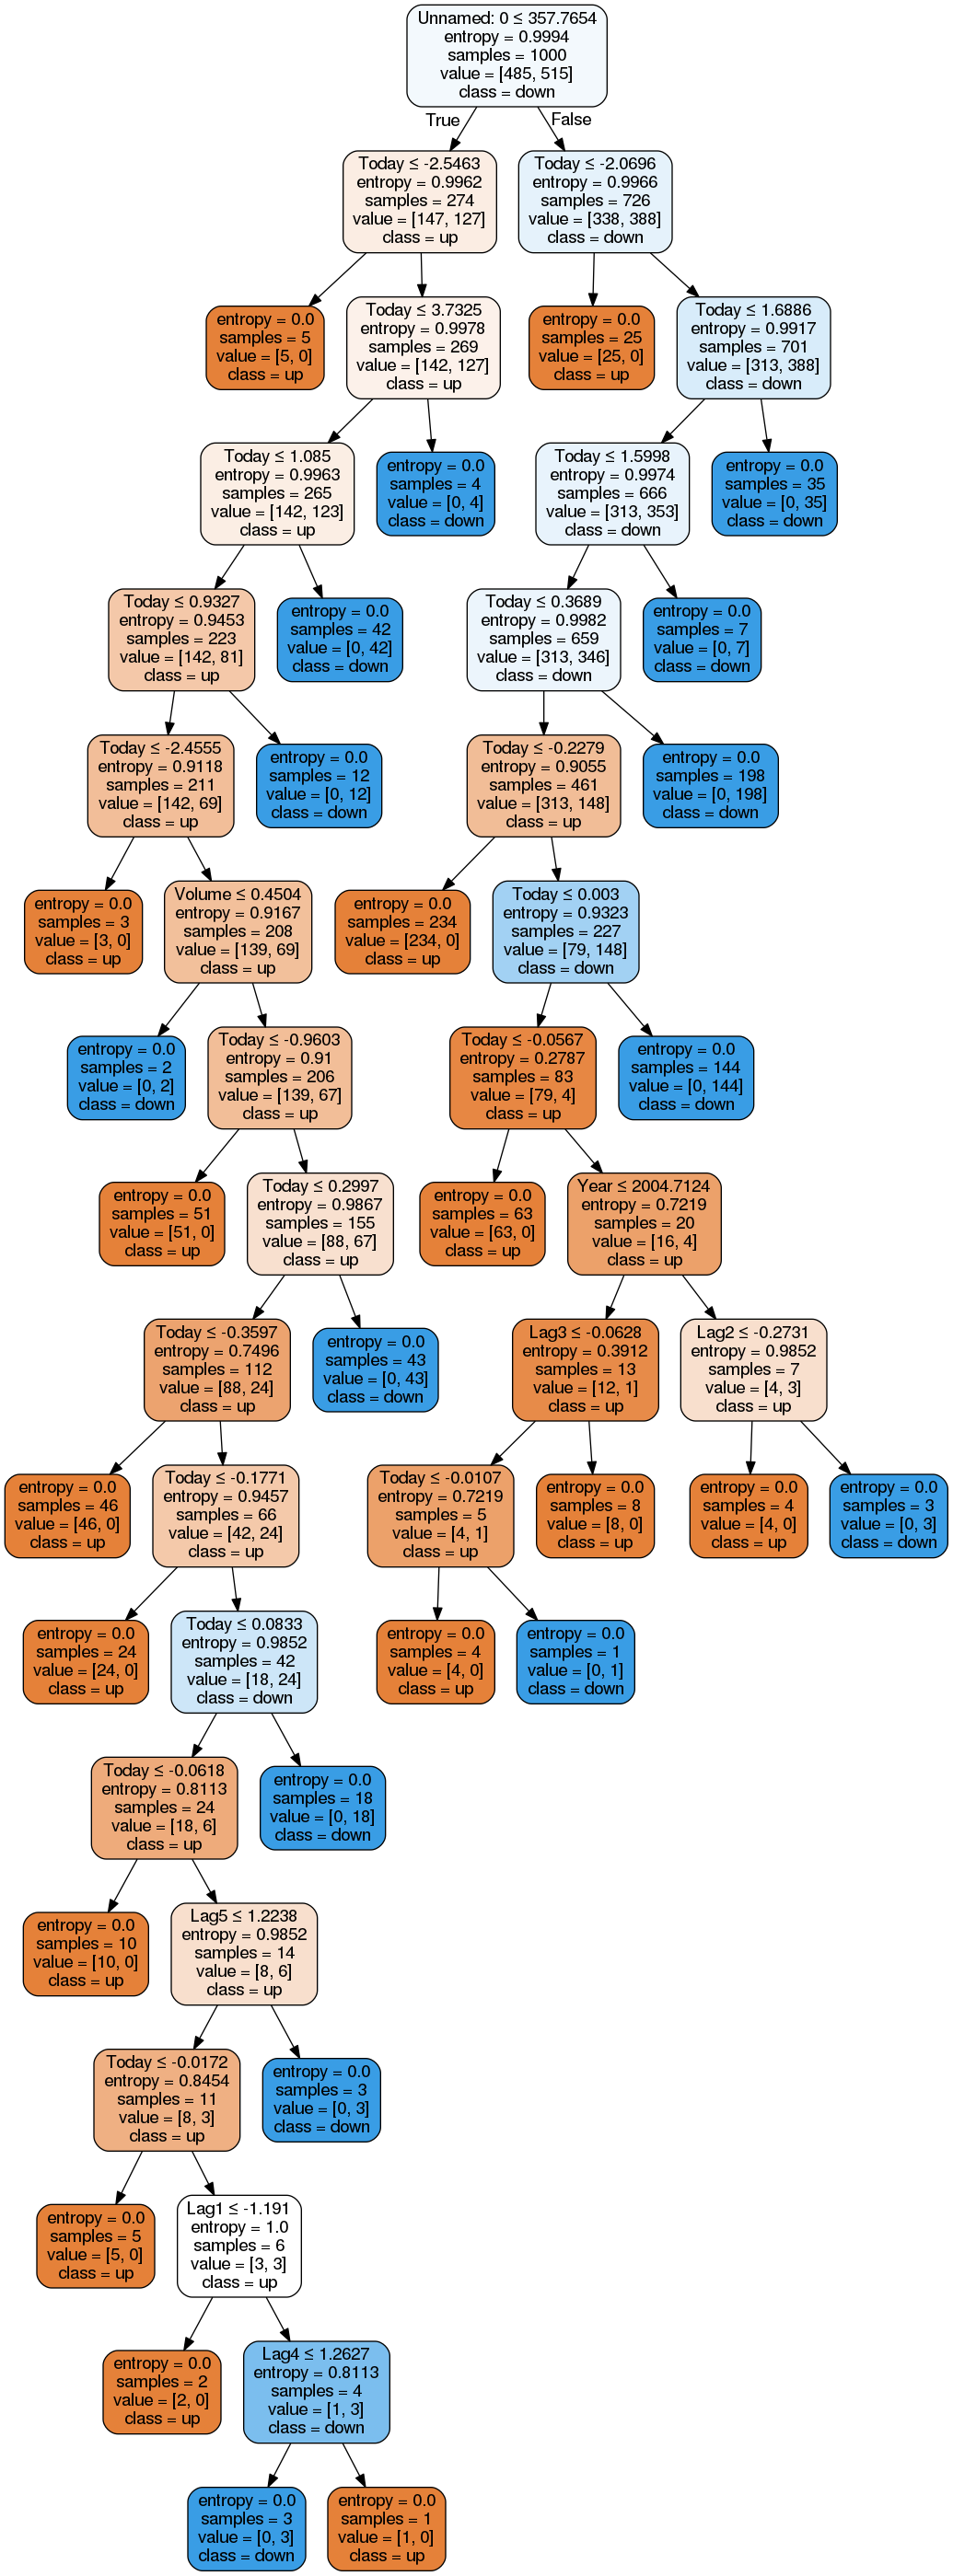

In [54]:
from sklearn import tree
from IPython.display import Image
import pydotplus
draw  = tree.export_graphviz(model_dt, out_file = None, feature_names = features, class_names=classes, filled=True, rounded=True, special_characters=True)
graph= pydotplus.graph_from_dot_data(draw)
Image(graph.create_png())